### Streamlit web app

Code: https://github.com/jenndy/wids-datathon-2022/blob/main/app.py

## Setup

In [ ]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:2f}'.format
pd.set_option('display.max_rows', 70)
sns.set(style='ticks', palette='Set2')

In [ ]:
climate = pd.read_csv("./drive/MyDrive/Colaboratory Notebooks/WiDS22_Climate_Change/Data/train.csv") 
climate = climate.set_index("id")
climate.sample(3)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
61957,6,State_6,Residential,Multifamily_Uncategorized,82262.000000,2015.000000,30.000000,42.700000,11,34.451613,59,-1,37.706897,61,26,48.870968,79,26,53.333333,82,43,62.790323,92,52,72.250000,88,63,78.677419,96,61,79.177419,96,54,71.800000,91,38,58.758065,85,34,49.766667,72,17,38.338710,60,1489,4252,42.170000,36.000000,101,57.215847,40,11,2,1,96,17,0,0,NaN,NaN,NaN,131.000000,77.687158
13669,6,State_4,Residential,Multifamily_Uncategorized,78055.000000,1925.000000,83.000000,198.100000,-2,25.166667,50,2,29.711538,65,12,44.516129,73,23,49.017241,88,38,61.933333,94,42,73.400000,97,54,77.451613,96,54,77.887097,98,48,70.931034,96,34,57.758065,83,20,47.116667,76,-9,24.629032,54,1390,5436,42.890000,27.300000,154,53.562674,92,42,19,6,113,40,0,0,NaN,NaN,NaN,NaN,58.278326
13126,6,State_4,Commercial,Office_Uncategorized,882560.000000,1985.000000,80.000000,198.100000,-2,25.166667,50,2,29.711538,65,12,44.516129,73,23,49.017241,88,38,61.933333,94,42,73.400000,97,54,77.451613,96,54,77.887097,98,48,70.931034,96,34,57.758065,83,20,47.116667,76,-9,24.629032,54,1390,5436,42.890000,27.300000,154,53.562674,92,42,19,6,113,40,0,0,NaN,NaN,NaN,NaN,71.736887


In [ ]:
climate.shape

(75757, 63)

In [ ]:
climate.dtypes

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
year_built                   float64
energy_star_rating           float64
ELEVATION                    float64
january_min_temp               int64
january_avg_temp             float64
january_max_temp               int64
february_min_temp              int64
february_avg_temp            float64
february_max_temp              int64
march_min_temp                 int64
march_avg_temp               float64
march_max_temp                 int64
april_min_temp                 int64
april_avg_temp               float64
april_max_temp                 int64
may_min_temp                   int64
may_avg_temp                 float64
may_max_temp                   int64
june_min_temp                  int64
june_avg_temp                float64
june_max_temp                  int64
july_min_temp                  int64
j

In [ ]:
climate.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
count,75757.000000,75757.000000,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000
mean,4.367755,165983.865858,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693
std,1.471441,246875.790940,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403
min,1.000000,943.000000,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169
25%,3.000000,62379.000000,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978.000000,39.350000,9.600000,10.000000,55.147541,22.0

In [ ]:
# for i in list(climate.columns):
#   print(i + ",")

## Multi-plot grid of numerical data 
Minus the min, avg, max temp for each month


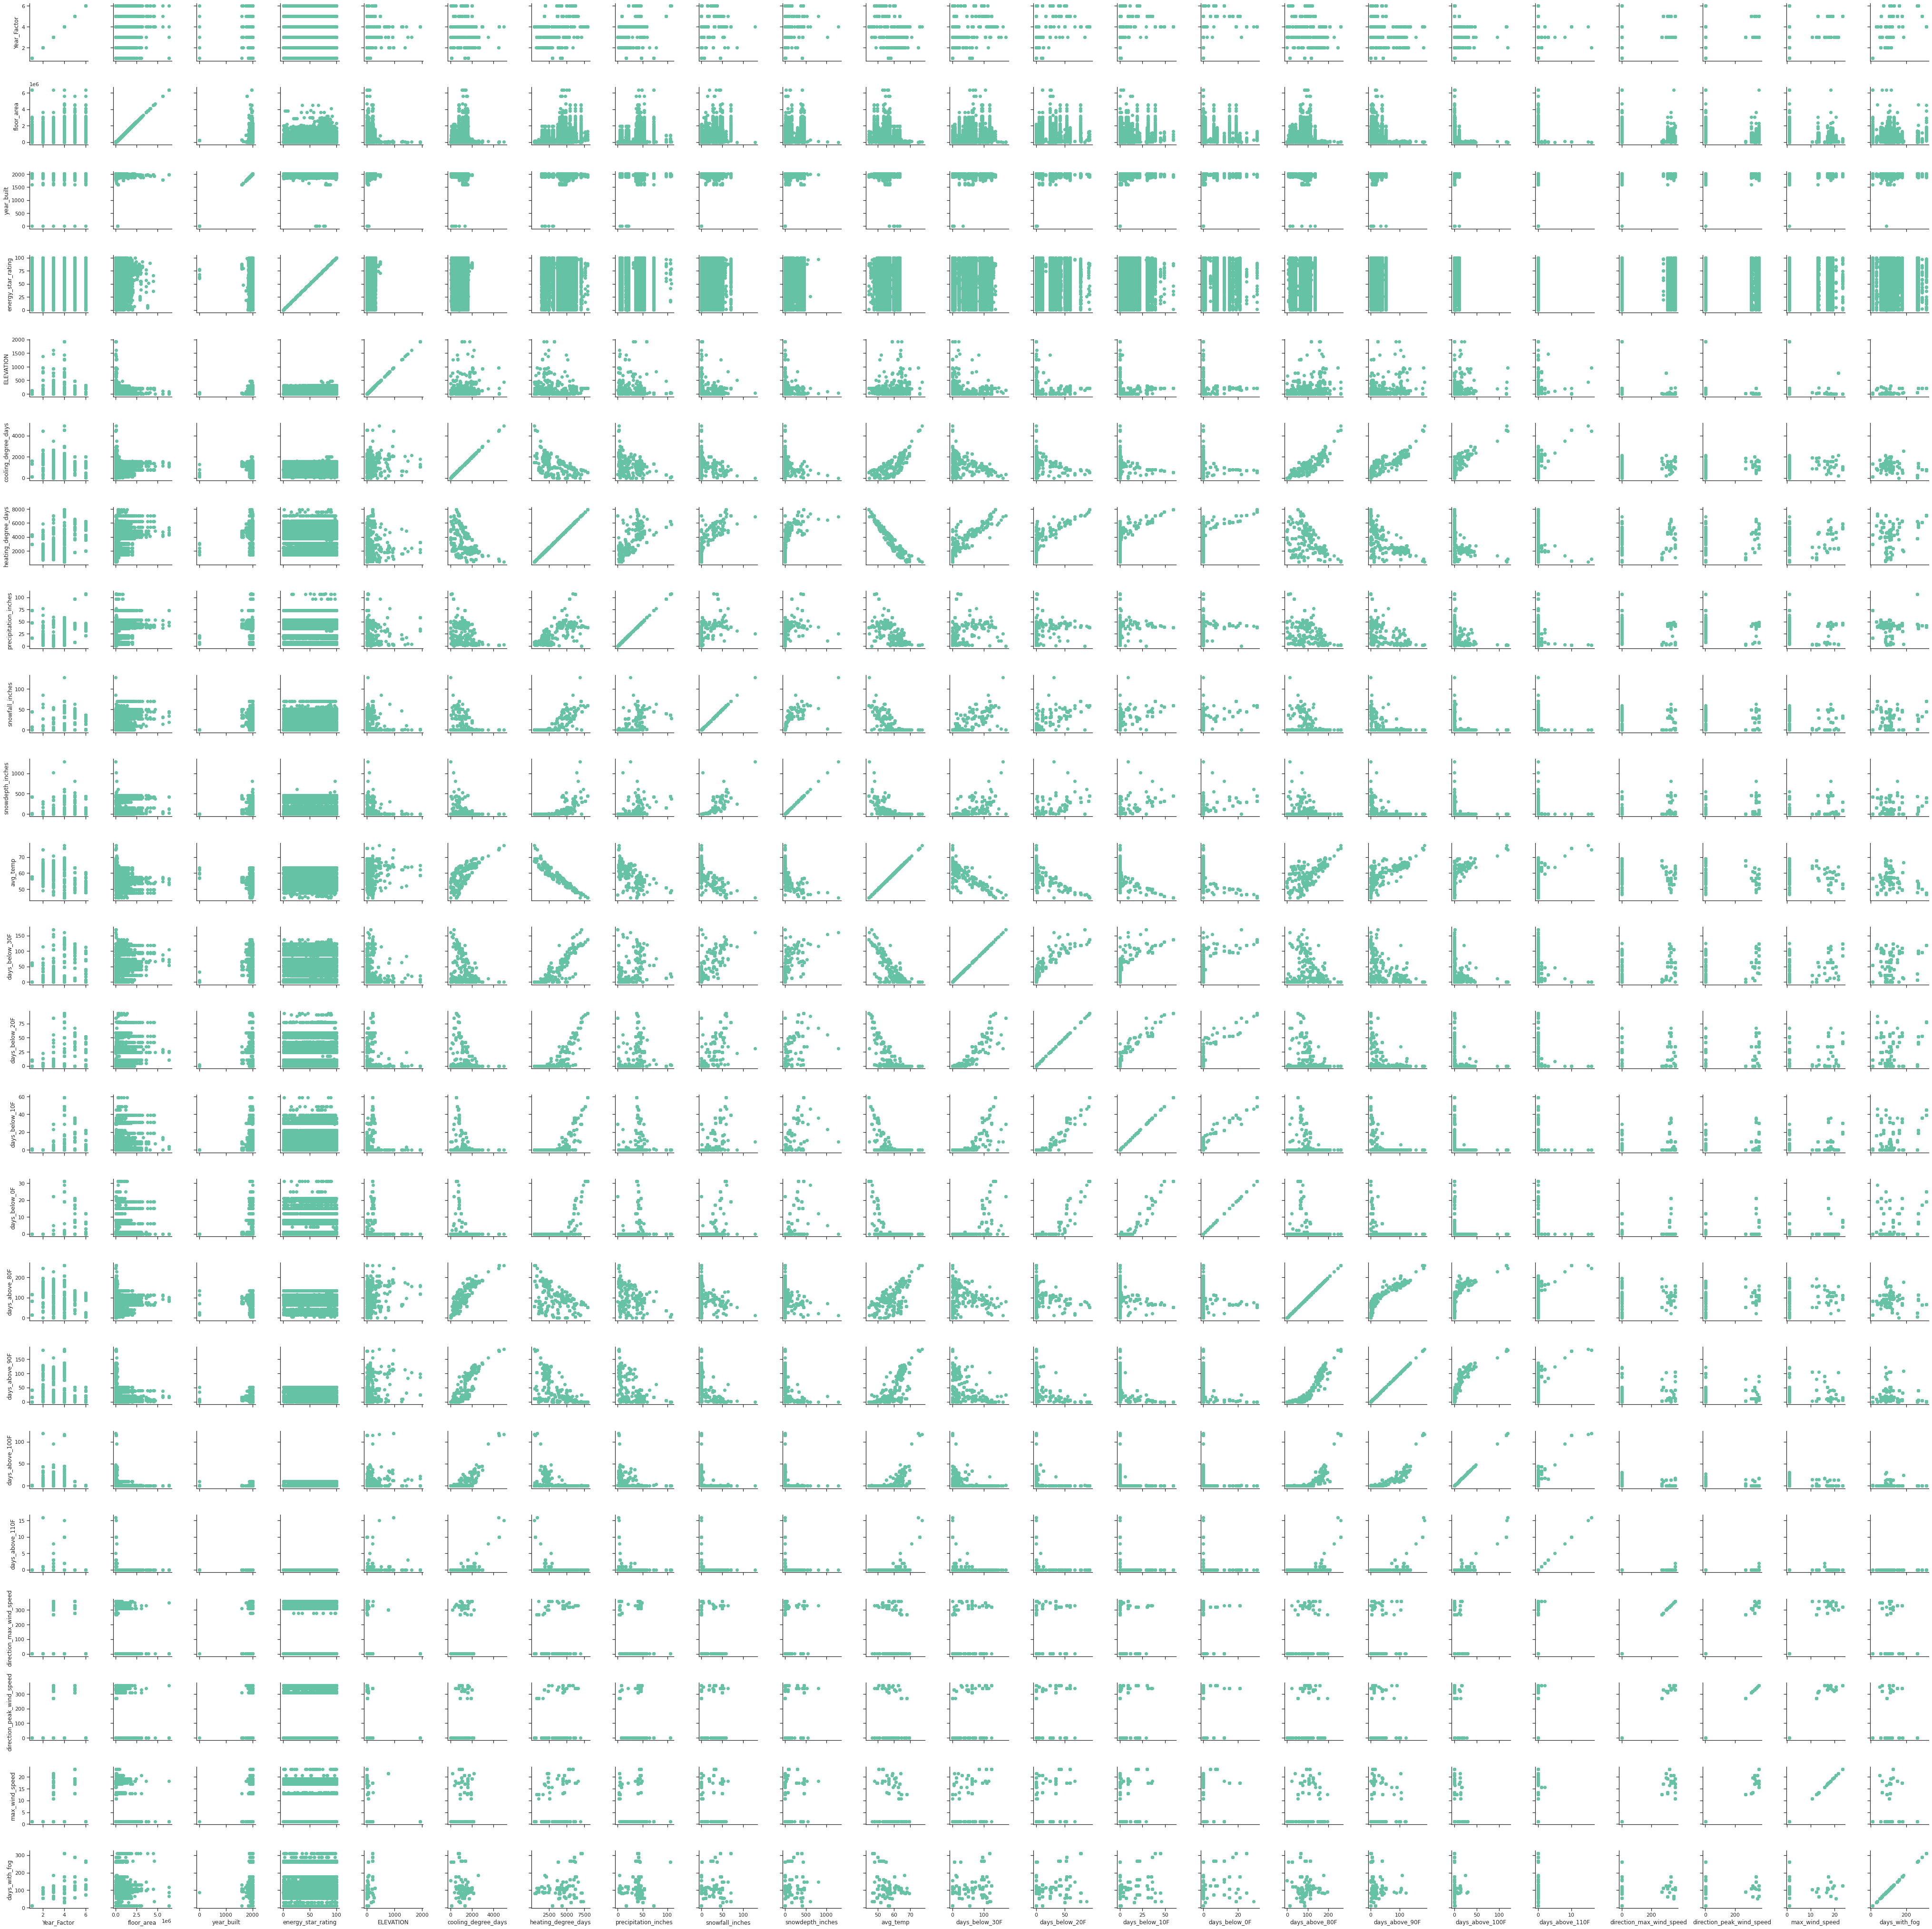

In [ ]:
# Pair grid
g = sns.PairGrid(climate[['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
                          'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp',
                          'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F', 'days_above_110F',
                          'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']])
g.map(plt.scatter)
sns.despine()
plt.savefig('pairgrids.png', dpi=180, bbox_inches='tight')

#### Correlations with scatterplot notes
* heating_degree_days avg_temp (inverse)
* heating_degree_days days_below_30F
* heating_degree_days days_below_20F
* cooling_degree_days days_above_80F
* cooling_degree_days days_above_90F

## Correlation Matrix Heatmap
For the numerical values

In [ ]:
# Correlation matrix
# Drop the 3 categorical features
climate_n = climate.drop(columns=['State_Factor', 'building_class', 'facility_type'])
climate_n.corr().round(2)

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
Year_Factor,1.000000,-0.040000,0.080000,-0.010000,0.130000,0.010000,-0.100000,-0.290000,-0.390000,-0.100000,-0.090000,-0.050000,0.050000,0.170000,-0.460000,-0.160000,-0.210000,-0.270000,-0.200000,0.110000,-0.310000,-0.100000,-0.410000,-0.100000,-0.190000,-0.410000,-0.070000,0.170000,0.340000,0.100000,0.180000,-0.080000,-0.100000,-0.140000,-0.060000,0.150000,0.360000,0.360000,-0.260000,-0.120000,-0.320000,0.030000,0.070000,-0.120000,0.180000,0.090000,-0.060000,0.140000,0.260000,0.260000,0.210000,0.190000,0.050000,-0.040000,-0.010000,0.230000,0.210000,0.230000,0.620000,-0.050000
floor_area,-0.040000,1.000000,0.100000,0.030000,0.100000,-0.150000,-0.140000,-0.100000,-0.110000,-0.120000,-0.040000,-0.120000,-0.100000,-0.010000,-0.090000,-0.100000,-0.030000,-0.060000,0.010000,0.030000,-0.020000,0.060000,0.030000,-0.010000,0.040000,0.020000,-0.010000,0.040000,0.020000,-0.010000,0.050000,0.060000,-0.100000,-0.060000,0.020000,-0.110000,-0.070000,0.030000,-0.090000,-0.060000,0.000000,0.050000,0.130000,0.060000,0.090000,0.070000,-0.110000,0.140000,0.140000,0.140000,0.140000,0.050000,0.020000,-0.030000,-0.010000,-0.000000,-0.000000,-0.000000,0.010000,0.070000
year_built,0.080000,0.100000,1.000000,-0.070000,0.050000,-0.010000,-0.030000,-0.080000,-0.000000,-0.020000,0.010000,-0.050000,-0.030000,-0.000000,-0.050000,-0.080000,-0.000000,-0.100000,-0.080000,-0.050000,-0.080000,-0.030000,0.010000,-0.090000,-0.050000,-0.040000,-0.100000,-0.050000,0.020000,-0.120000,-0.090000,-0.100000,-0.070000,-0.130000,-0.100000,-0.060000,-0.070000,-0.010000,-0.070000,-0.080000,-0.080000,-0.070000,0.070000,0.050000,-0.050000,-0.050000,-0.110000,0.050000,0.040000,0.060000,0.050000,-0.040000,-0.010000,-0.050000,NaN,0.000000,-0.010000,0.000000,0.080000,0.020000
energy_star_rating,-0.010000,0.030000,-0.070000,1.000000,-0.020000,0.140000,0.150000,0.080000,0.130000,0.140000,0.100000,0.130000,0.140000,0.080000,0.110000,0.100000,0.100000,-0.020000,-0.070000,0.010000,-0.040000,-0.110000,0.060000,-0.090000,-0.110000,-0.010000,-0.080000,-0.090000,-0.030000,-0.050000,-0.090000,-0.060000,0.080000,0.050000,0.040000,0.100000,0.070000,-0.010000,0.020000,0.030000,-0.050000,-0.100000,-0.130000,-0.110000,-0.140000,-0.110000,0.090000,-0.130000,-0.110000,-0.080000,-0.020000,-0.070000,0.020000,0.060000,NaN,-0.000000,0.000000,-0.000000,0.020000,-0.510000
ELEVATION,0.130000,0.100000,0.050000,-0.020000,1.000000,-0.260000,-0.230000,-0.350000,-0.150000,-0.180000,0.030000,-0.290000,-0.110000,0.070000,-0.180000,-0.260000,0.070000,-0.300000,-0.130000,0.080000,-0.420000,-0.080000,0.170000,-0.430000,-0.190000,-0.130000,-0.370000,-0.110000,0.060000,-0.200000,-0.010000,0.030000,-0.210000,-0.180000,-0.020000,-0.290000,-0.070000,0.210000,-0.400000,-0.280000,-0.210000,-0.110000,0.260000,-0.040000,0.010000,0.050000,-0.330000,0.310000,0.400000,0.560000,0.620000,0.060000,0.180000,0.100000,0.080000,0.050000,0.070000,0.040000,0.500000,0.010000
january_min_temp,0.010000,-0.150000,-0.010000,0.140000,-0.260000,1.000000,0.970000,0.660000,0.810000,0.860000,0.530000,0.

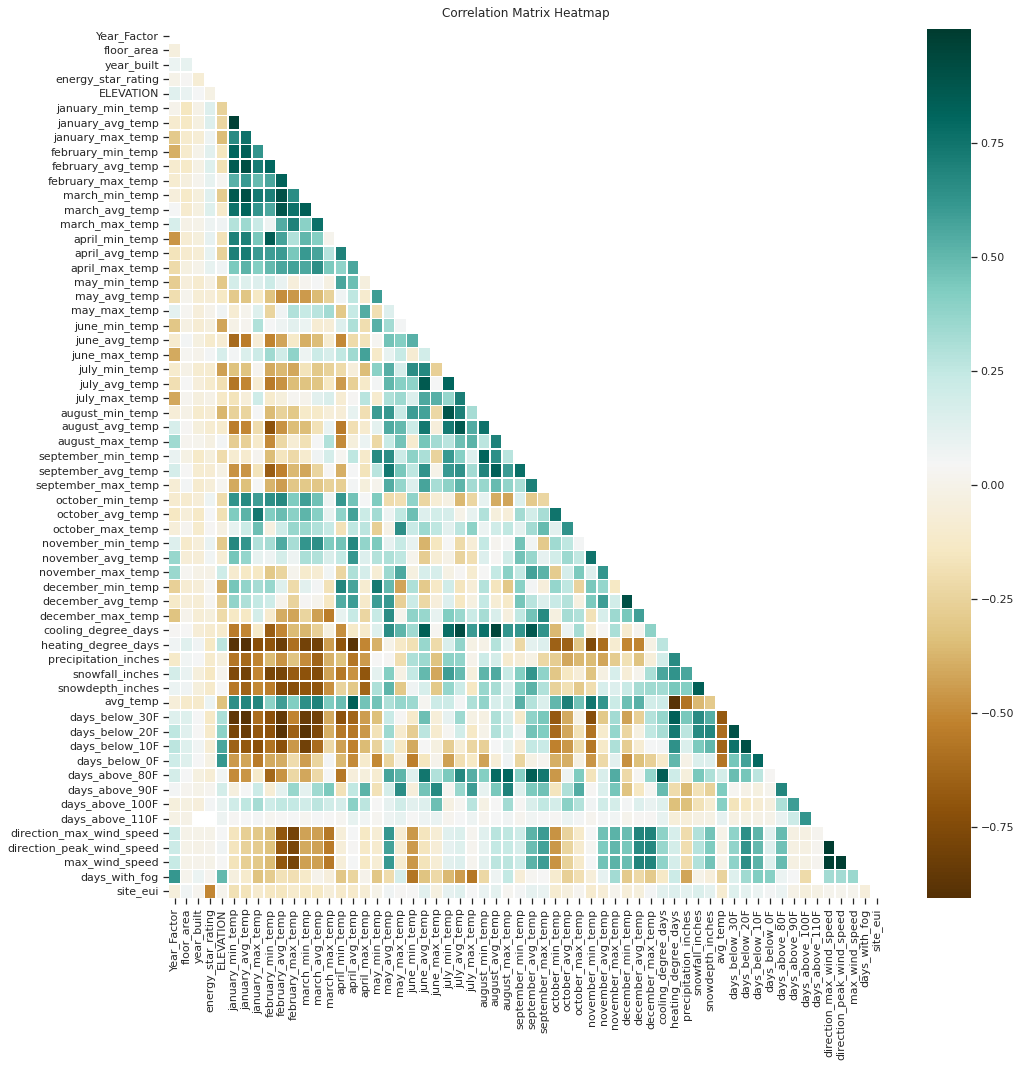

In [ ]:
plt.figure(figsize=(16, 16))
mask = np.triu(np.ones_like(climate_n.corr(), dtype=bool))

heatmap = sns.heatmap(climate_n.corr(), mask=mask, linewidth=.5, cmap='BrBG')
heatmap.set_title('Correlation Matrix Heatmap', fontdict={'fontsize':12}, pad=12);

plt.savefig('heatmap.png', dpi=180, bbox_inches='tight')
#sns.heatmap(climate_n.corr().round(2), annot=True, fmt="d", linewidth=.5,cmap='Blues')

#### Interesting Correlations from Heatmap
1. **site_eui** has positive corr with **energy_star_rating** and weak direct correlations with all the other numerical features
1. **year_factor and days_above_110F** were all missing in test set run
1. Year_Factor - positive with days_with_fog
1. floor_area - weak correlations
1. year_built - weak correlations
1. energy_star_rating - positive corr with site_eui
1. elevation - days_with_fog, days_below_0F, 10F
1. heating_degree_days - strong inverse with fall, winter, spring months temp
1. cooling_degree_days - strong positive with summer months temp
1. max_wind_speed - very strong positive with direction_max_wind_speed, direction_peak_wind_speed
1. days_with_fog - positive with Year_Factor, elevation
1. days_below and monthly temp - inverse corr for colder months
1. days_above and monthly temp - positive corr for warmer months

## Heatmap of Missing Values in Training Data



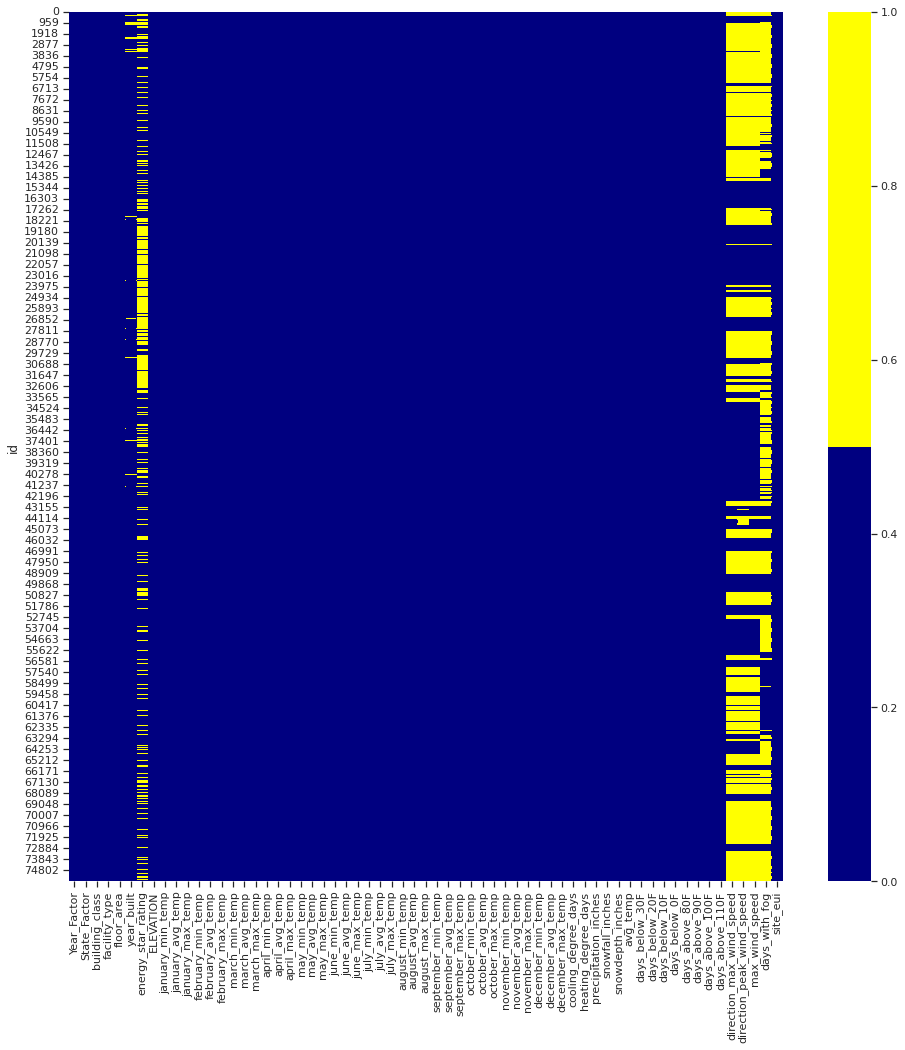

In [ ]:
fig = plt.figure(figsize = (16, 16))
sns.heatmap(climate.isna(), cmap = ['navy', 'yellow'])
plt.savefig('heatmap_missing_values.png', dpi=72, bbox_inches='tight')



*   Features with missing values: energy_star_rating (impute), year_built (drop rows), direction_max_wind_speed, direction_peak_wind_speed, max_wind_speed, days_with_fog
*   Features with significant missing values: direction_max_wind_speed, direction_peak_wind_speed, max_wind_speed, days_with_fog (drop features)

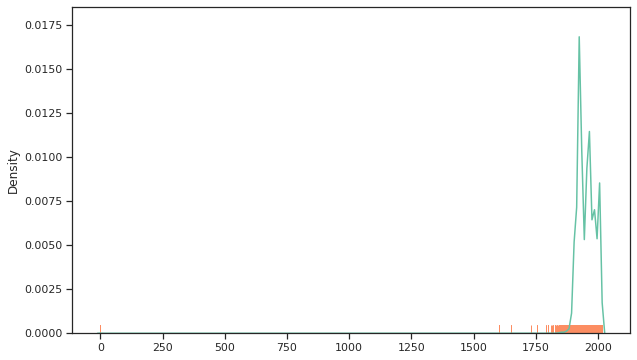

In [ ]:
fig = plt.figure(figsize = (10, 6))
sns.kdeplot(climate['year_built'].values)
sns.rugplot(climate['year_built'].values)
plt.savefig('year_built_distribution.png', dpi=72, bbox_inches='tight')

- Change year 0 values to missing values